<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/modpred_Regressao_Arvores_Decis%C3%A3o_grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 3:**
* *Anna Carolina de Roldão*
* *Arthur Lira*
* *Erike Simon*
* *José Aparecido Silvano*
* *Yaci Mair da Silva Ribeiro*

# Arvores de Decisão - Regressão

Base de dados utilizada:
1. Carregamento de dados
2. O valor esperado de saída é **actual**
3. Remover as colunas 'year', 'month', 'day', 'week' pois não vamos considerar dados históricos relacionados a série temporal
4. Análise descritiva dos dados
5. Remoção de campos desnecessários
6. Tratamento de dados nulos e/ou faltantes
7. Separação dos dados, holdout
8. Normalização dos dados
9. Treinamento de modelos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Obtenha os dados
** Leia o arquivo csv 'temps.csv' em um DataFrame **

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aparecidoSilvano/prob-cesar-grupo3/main/temps.csv')

** Verifique o cabeçalho do DataFrame.**

In [ ]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [ ]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Remoção das colunas year,	month, day e week, pois não vamos trabalhar com a série temporal

In [ ]:
df.drop(columns=['year', 'month', 'day', 'week'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          348 non-null    int64  
 1   temp_1          348 non-null    int64  
 2   average         348 non-null    float64
 3   actual          348 non-null    int64  
 4   forecast_noaa   348 non-null    int64  
 5   forecast_acc    348 non-null    int64  
 6   forecast_under  348 non-null    int64  
 7   friend          348 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 21.9 KB


## Estatística Descritiva

Dados faltantes

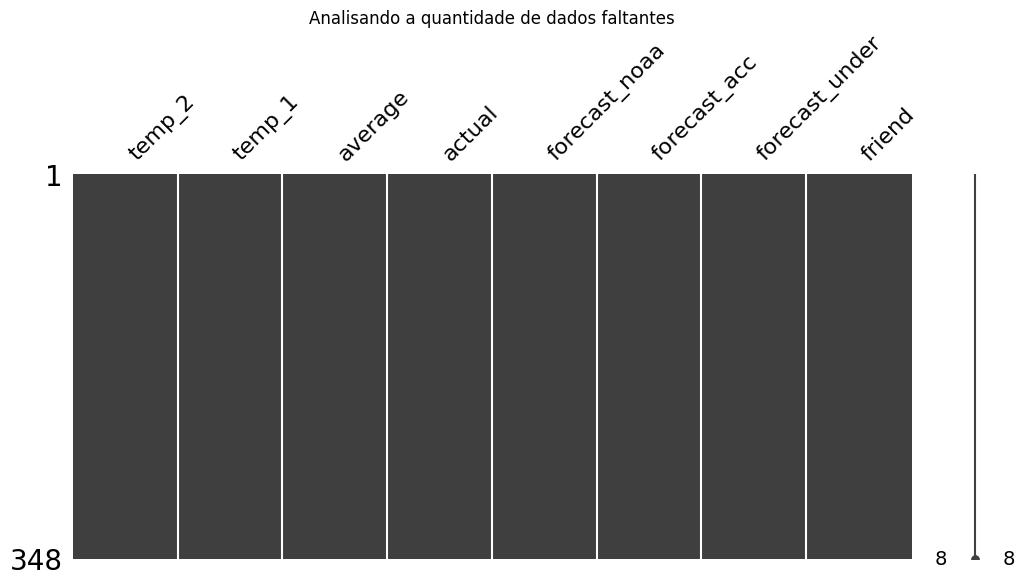

In [ ]:
import missingno as msno

msno.matrix(df, figsize=(12,5))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

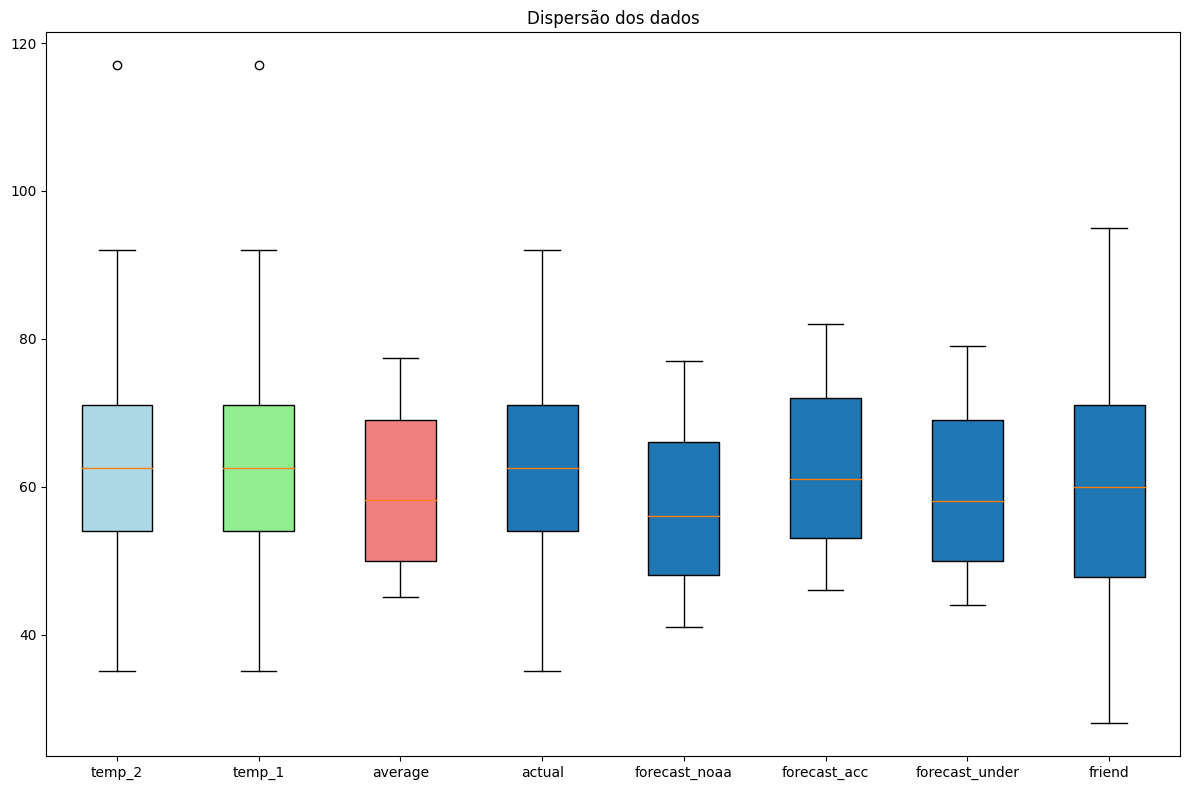

In [ ]:
plt.figure(figsize=(12, 8))  # Tamanho da figura

# Cria o boxplot com paleta de cores padrão do Matplotlib
box = plt.boxplot(df.values, patch_artist=True, labels=df.columns)

# Definir uma cor para os boxes
box_colors = ['lightblue', 'lightgreen', 'lightcoral']

# Preenche os boxes com as cores definidas
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

plt.title('Dispersão dos dados')
plt.tight_layout() # Ajusta o layout para que os rótulos do eixo x não se sobreponham
plt.show()

<ipython-input-10-c7308bf91e69>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, grid=False)


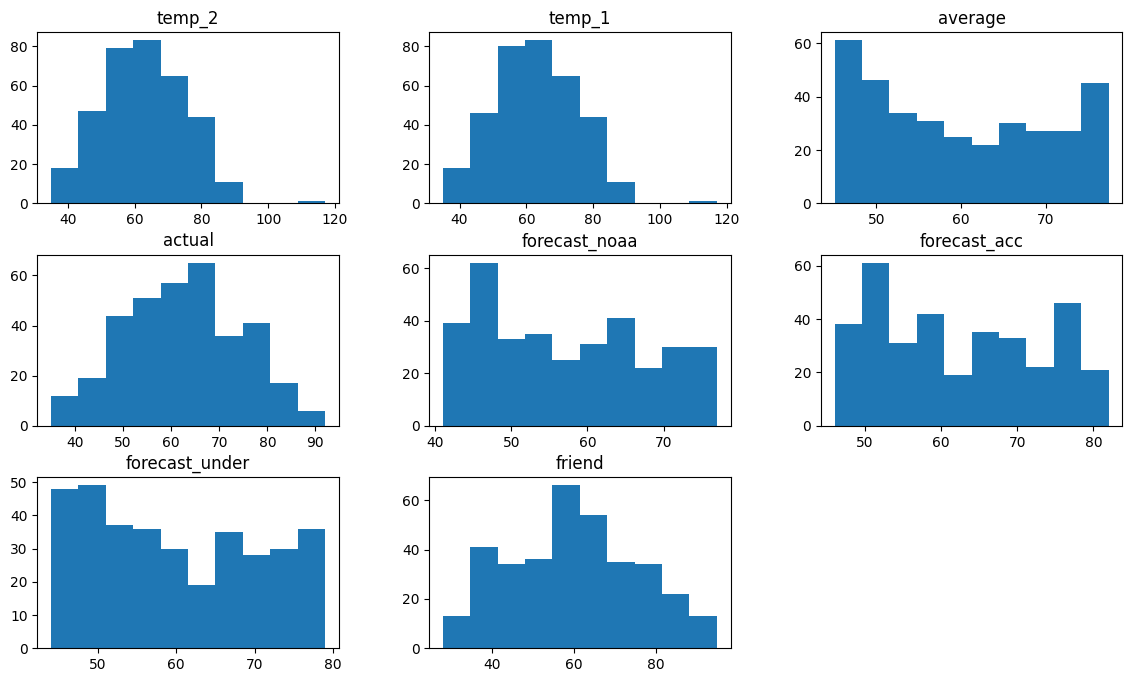

In [ ]:
fig = plt.figure(figsize = (14,8))
ax = fig.gca()
df.hist(ax = ax, grid=False)
plt.title("Dispersão dos dados")
plt.show()

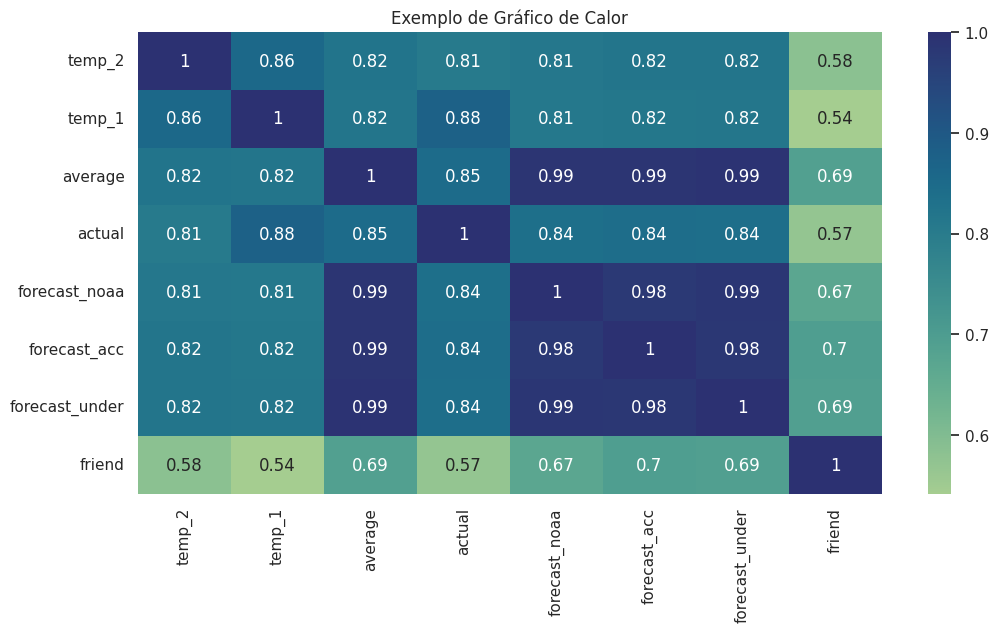

In [ ]:
# Criação do gráfico de calor usando o Seaborn
sns.set()
plt.figure(figsize=(12, 6))  # Define o tamanho da figura

# Plot do gráfico de calor
sns.heatmap(df.corr(), cmap="crest", annot=True)

plt.title('Exemplo de Gráfico de Calor')
plt.show()

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['actual']),
                                                    df['actual'],
                                                    test_size=0.25,
                                                    random_state=111)

In [ ]:
pd.DataFrame(X_train)

,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
120,77,87,62.1,62,66,64,69
20,48,52,47.8,43,51,46,57
114,59,60,60.7,59,65,60,50
264,63,64,62.5,60,65,61,73
239,70,74,71.5,71,75,70,82
...,...,...,...,...,...,...,...
169,70,76,70.8,68,75,71,57
275,60,61,58.4,58,60,57,41
86,56,64,55.7,51,57,56,57
212,77,73,77.3,77,81,77,93


## Normalização dos dados

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

Converta as variáveis independentes com o StandardScaler

In [ ]:
# Normalizar todas as features como primeira abordagem
sc = StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_train_scaled

array([[ 1.17318321,  1.97519864,  0.17908574, ...,  0.31190317,
         0.35302158,  0.50816738],
       [-1.30444617, -0.92660895, -1.19312058, ..., -1.1366151 ,
        -1.33932067, -0.26821322],
       [-0.36465572, -0.26333864,  0.04474386, ...,  0.21533528,
        -0.02305447, -0.72110191],
       ...,
       [-0.6209622 ,  0.06829651, -0.43504856, ..., -0.55720779,
        -0.39913053, -0.26821322],
       [ 1.17318321,  0.81447561,  1.63765469, ...,  1.76042143,
         1.57526876,  2.06092859],
       [-1.56075266, -1.92151441, -1.45220849, ..., -1.52288663,
        -1.33932067, -1.43278413]])

In [ ]:
df_x_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_x_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
df_x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          261 non-null    float64
 1   temp_1          261 non-null    float64
 2   average         261 non-null    float64
 3   forecast_noaa   261 non-null    float64
 4   forecast_acc    261 non-null    float64
 5   forecast_under  261 non-null    float64
 6   friend          261 non-null    float64
dtypes: float64(7)
memory usage: 14.4 KB


In [ ]:
df_x_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          87 non-null     float64
 1   temp_1          87 non-null     float64
 2   average         87 non-null     float64
 3   forecast_noaa   87 non-null     float64
 4   forecast_acc    87 non-null     float64
 5   forecast_under  87 non-null     float64
 6   friend          87 non-null     float64
dtypes: float64(7)
memory usage: 4.9 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 120 to 340
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          261 non-null    int64  
 1   temp_1          261 non-null    int64  
 2   average         261 non-null    float64
 3   forecast_noaa   261 non-null    int64  
 4   forecast_acc    261 non-null    int64  
 5   forecast_under  261 non-null    int64  
 6   friend          261 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.3 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 49 to 244
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          87 non-null     int64  
 1   temp_1          87 non-null     int64  
 2   average         87 non-null     float64
 3   forecast_noaa   87 non-null     int64  
 4   forecast_acc    87 non-null     int64  
 5   forecast_under  87 non-null     int64  
 6   friend          87 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.4 KB


## Árvores de Decisão

In [ ]:
from sklearn import tree # importa lib de árvores de decisão

In [ ]:
model = tree.DecisionTreeRegressor(random_state=111) # Cria árvore para regressão
model

DecisionTreeRegressor(random_state=111)

O método '*.DecisionTreeRegressor()*' por padrão usa a métrica de **impureza de Gini** para dividir a base de dados quando está sendo aplicado em um problema de regressão. No contexto de regressão, a **impureza de Gini** é usada para medir a dispersão dos valores de saída em um nó.
Durante a construção da árvore de decisão para regressão, a impureza de Gini é interpretada de maneira diferente. Em vez de medir a impureza das classes, ela mede o grau de dispersão dos valores de saída. A divisão é feita de forma a minimizar a variância dos valores de saída em cada ramo, buscando criar segmentos mais homogêneos.

### Executar o modelo treinado na base de treinamento

In [ ]:
model.fit(X_train_scaled, y_train) # Cria a árvore baseada nos dados de treinamento
y_train_pred = model.predict(X_train_scaled) # Prediz a saída dos dados de treino
y_test_pred = model.predict(X_test_scaled) # Prediz a saída dos dados de teste

In [ ]:
model.score(X_train_scaled, y_train)

1.0

In [ ]:
model.score(X_test_scaled, y_test)

0.6029399996799129

O método '*.score()*' aplicado ao '*.DecisionTreeRegressor()*' calcula o coeficiente de determinação *R²*.

### Avaliação de Regressores - Exibir os Resultados

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
# Função para cálculo de métricas
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [ ]:
print("Dados de treino:\n")
print_metrics(y_train, y_train_pred)

Dados de treino:

MEAN:  0.0
MAPE:  0.0
MSE:  0.0
RMSE:  0.0
R²:  1.0


In [ ]:
print("Dados de teste:\n")
print_metrics(y_test, y_test_pred)

Dados de teste:

MEAN:  5.781609195402299
MAPE:  0.09329931537191956
MSE:  59.0
RMSE:  3481.0
R²:  0.6029399996799129


## Validação cruzada com o algoritmo Árvores de Decisão

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
reg_cv_scores = cross_validate(model, X_train_scaled, y_train)

'*cross_validate()*' retorna um dicionário contendo várias métricas de avaliação, incluindo pontuações de treinamento e teste, bem como métricas de ajuste e tempo de ajuste. Ele oferece mais flexibilidade, permitindo que você especifique várias métricas e também retorne métricas de treinamento e tempo de ajuste.

Por padrão, o método '*cross_validate()*' do divide os dados de treinamento em 5 *folds* durante o processo de validação.

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_cv_scores['test_score'].mean(), reg_cv_scores['test_score'].std()))

0.67 accuracy with a standard deviation of 0.09


'*test_score*' é uma chave do dicionário *reg_cv_scores* que contém os scores de teste para cada fold.

### Exiba a árvore de decisão do modelo treinado

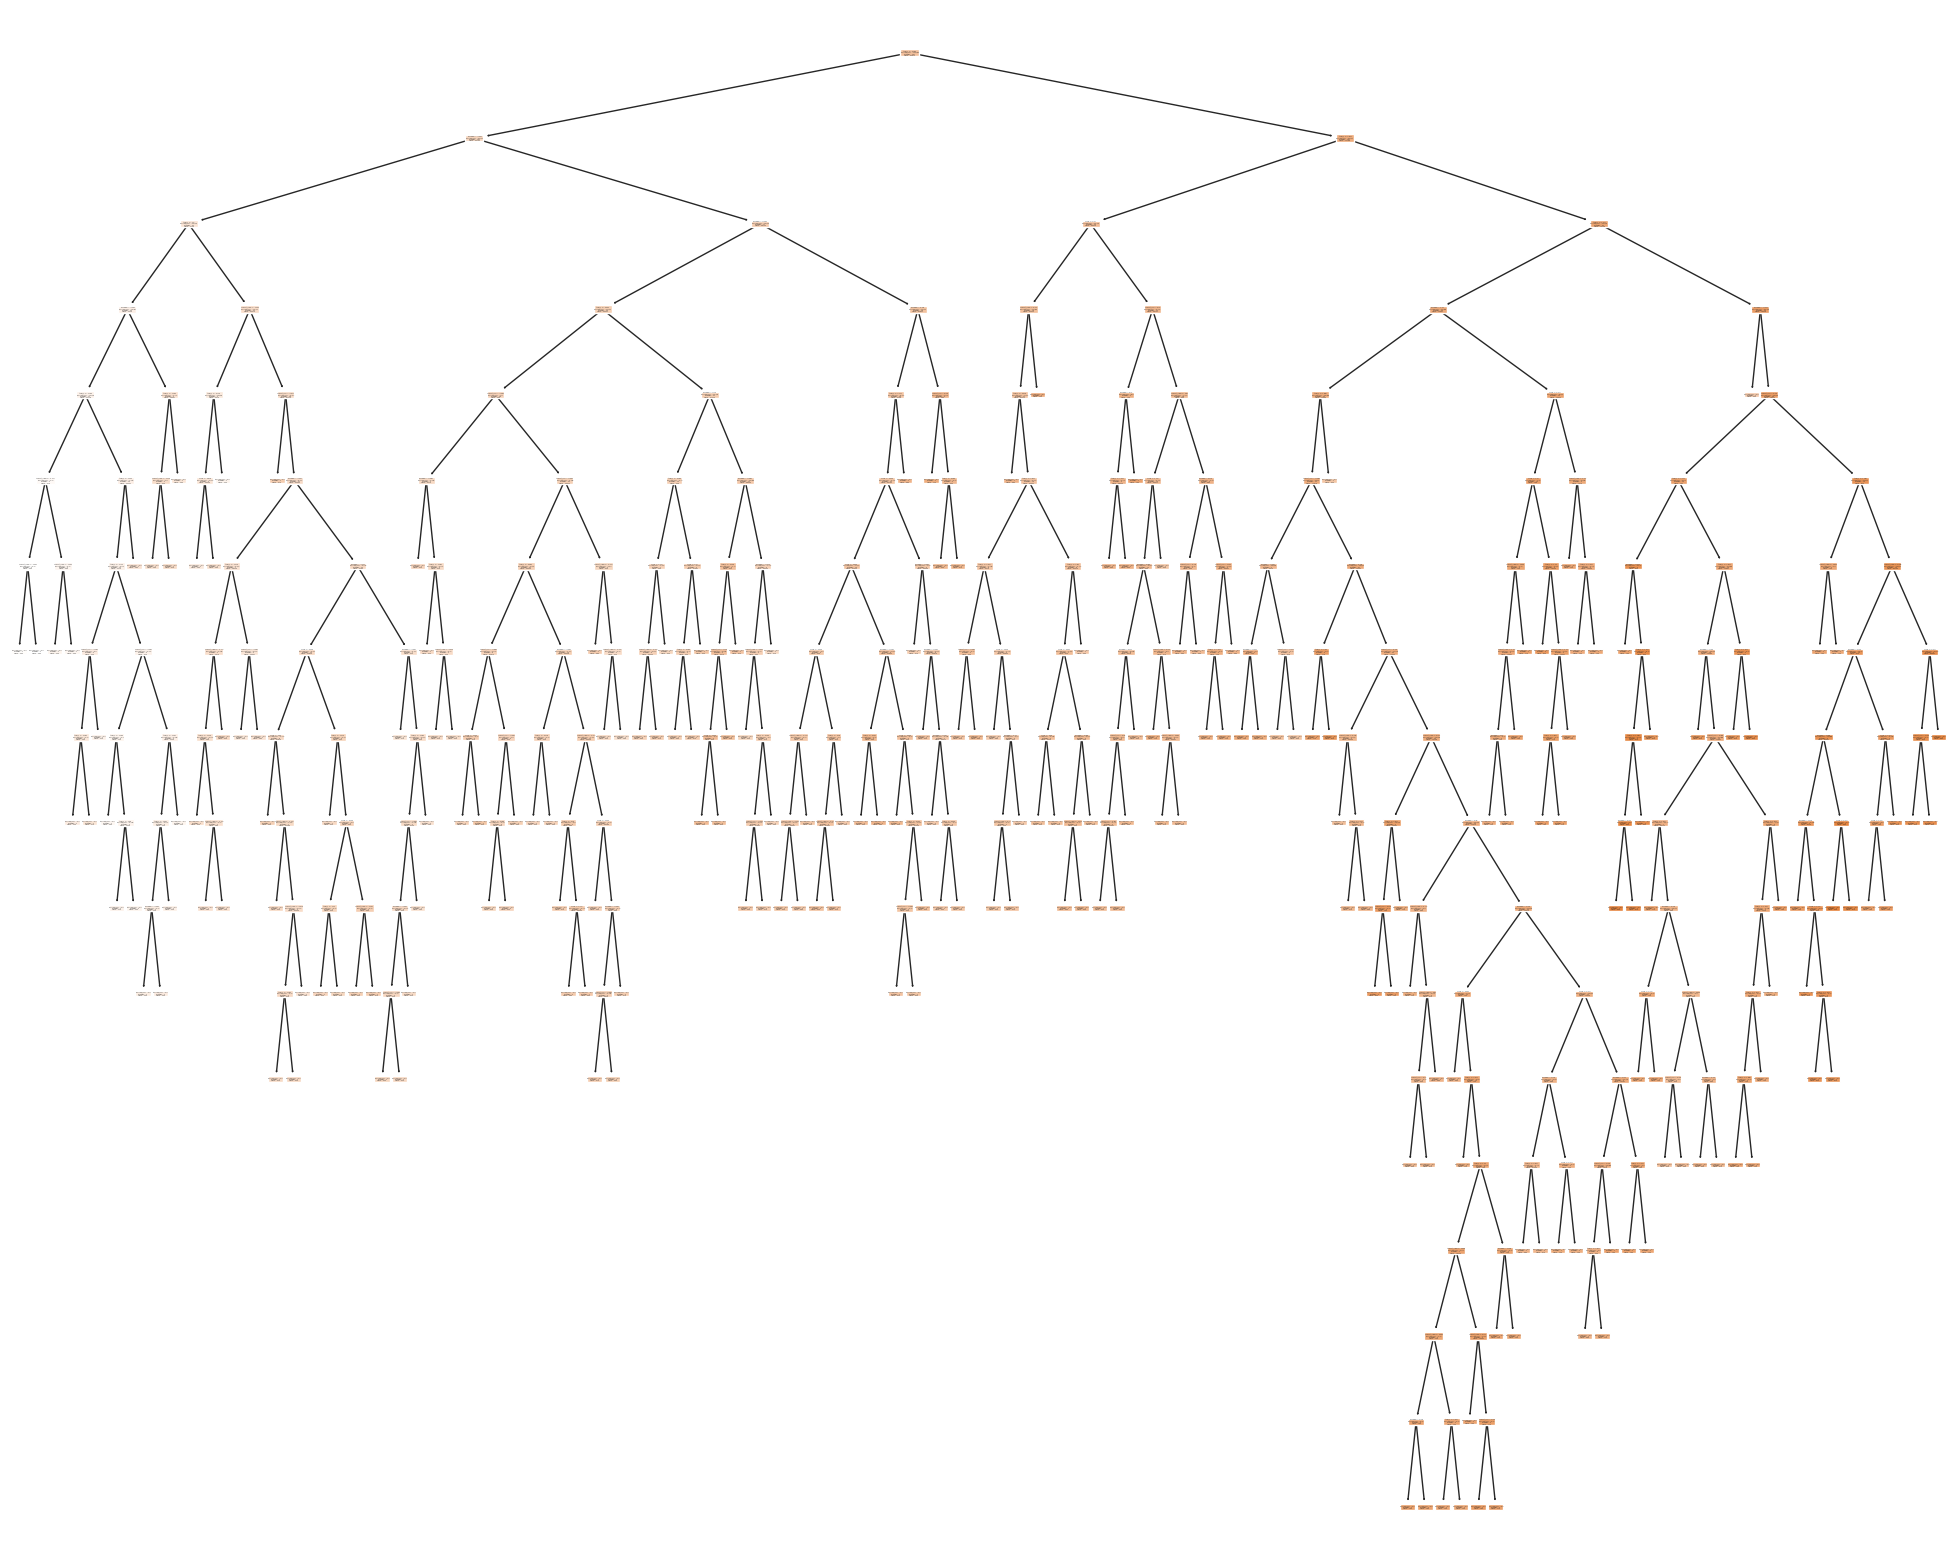

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=y_test.unique(),
                   filled=True)

### Avaliar o melhor valor de max_depth

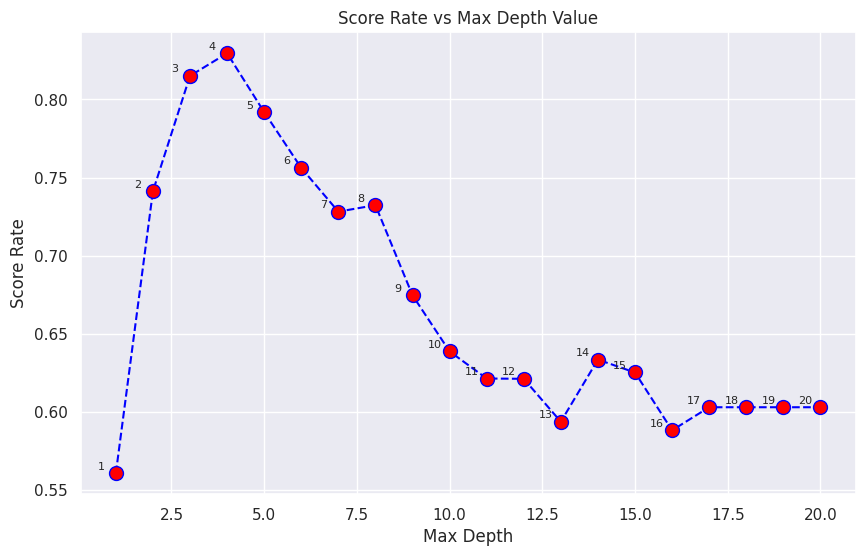

In [ ]:
import numpy as np

score = []

for i in range(1,21):
  model = tree.DecisionTreeRegressor(random_state=111, max_depth=i)
  model.fit(X_train_scaled, y_train)
  score.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Score Rate')

# Adicionar os valores do eixo x acima de cada marcador
for i, scr in enumerate(score):
    plt.text(i+0.6, scr+0.001, str(i+1), ha='center', va='bottom', fontsize=8)

plt.show()

O parâmetro '*max_depth*' no '*DecisionTreeRegressor()*' controla a profundidade máxima da árvore de decisão. Ele limita a quantidade de divisões que a árvore pode fazer, ou seja, controla a quantidade de níveis na árvore.

Uma árvore com uma profundidade maior terá mais nós e folhas, o que permite que o modelo se ajuste mais aos dados de treinamento. Isso pode resultar em um ajuste excessivo (overfitting), onde a árvore memoriza os dados de treinamento em vez de capturar padrões gerais. por outro lado, uma árvore com uma profundidade menor terá menos nós e folhas, o que pode resultar em uma simplificação do modelo. Isso pode levar a um ajuste insuficiente (underfitting), onde a árvore não consegue capturar nuances nos dados de treinamento.

se o valor de '*max_depth*' não for especificado ao criar uma instância do 'DecisionTreeRegressor()*', a árvore de decisão crescerá até que as folhas estejam puras (ou seja, até que todas as amostras em cada folha sejam da mesma classe ou tenham o mesmo valor de destino para problemas de regressão).

### Criar um regressor com o melhor valor para max_depth e avalie





In [ ]:
reg_best = tree.DecisionTreeRegressor(random_state=111, max_depth=score.index(max(score))+1)

reg_best.fit(X_train_scaled, y_train)
print('R² Train: ', reg_best.score(X_train_scaled, y_train))
print('R² Test: ',reg_best.score(X_test_scaled, y_test))

R² Train:  0.8770739780380298
R² Test:  0.8295978517092348


In [ ]:
print("Dados de treino:\n")
print_metrics(y_train, reg_best.predict(X_train_scaled))

Dados de treino:

MEAN:  3.1176474881140197
MAPE:  0.049318693841902884
MSE:  16.591163913841402
RMSE:  275.2667200159532
R²:  0.8770739780380298


In [ ]:
print("Dados de teste:\n")
print_metrics(y_test, reg_best.predict(X_test_scaled))

Dados de teste:

MEAN:  4.07075887826395
MAPE:  0.06695221574918843
MSE:  25.32042195398782
RMSE:  641.1237679279884
R²:  0.8295978517092348


In [ ]:
reg_best_cv_scores = cross_validate(reg_best, X_train_scaled, y_train)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_best_cv_scores['test_score'].mean(), reg_best_cv_scores['test_score'].std()))

0.77 accuracy with a standard deviation of 0.08


### Plot dos valores previstos vs reais

In [ ]:
y_pred = reg_best.predict(X_test_scaled)

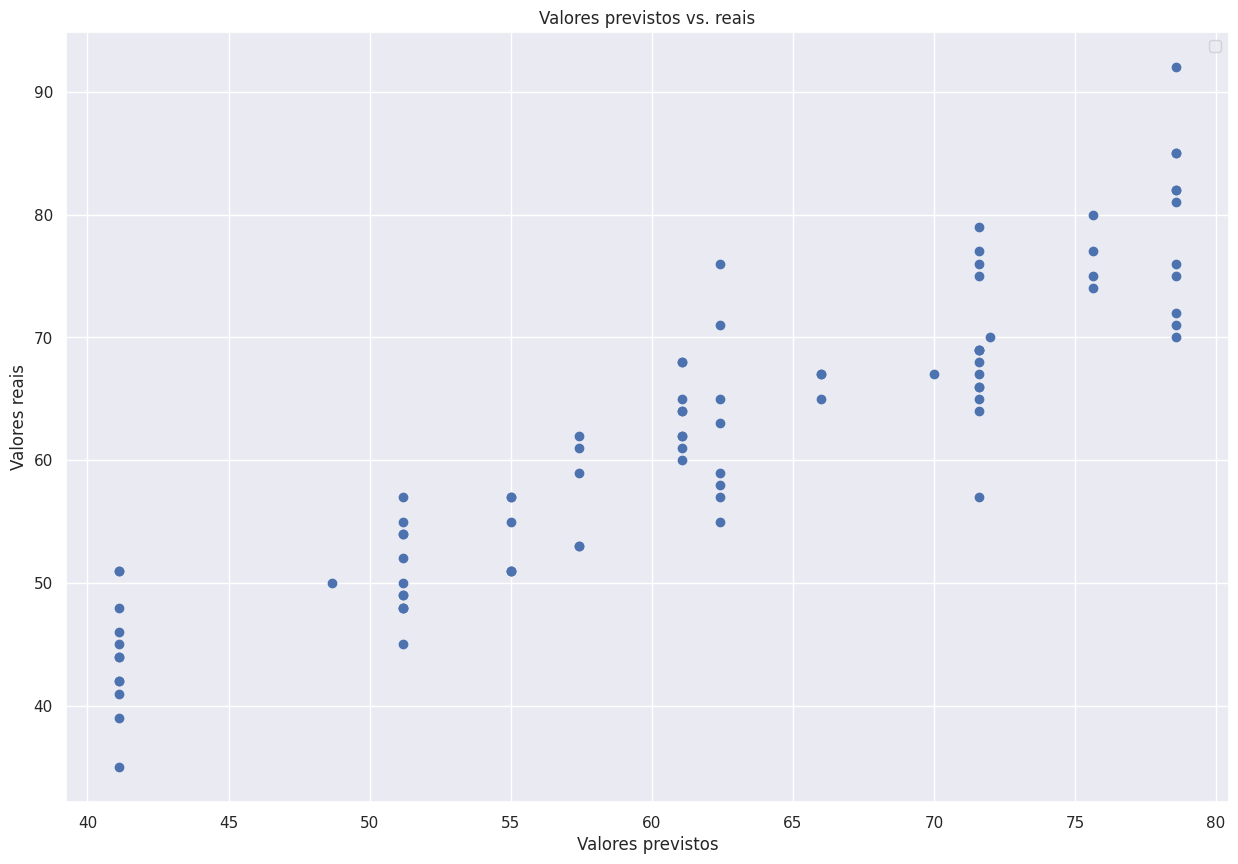

In [ ]:
# Cria o gráfico de dispersão
fig = plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_test)
plt.title('Valores previstos vs. reais')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.legend()
plt.show()

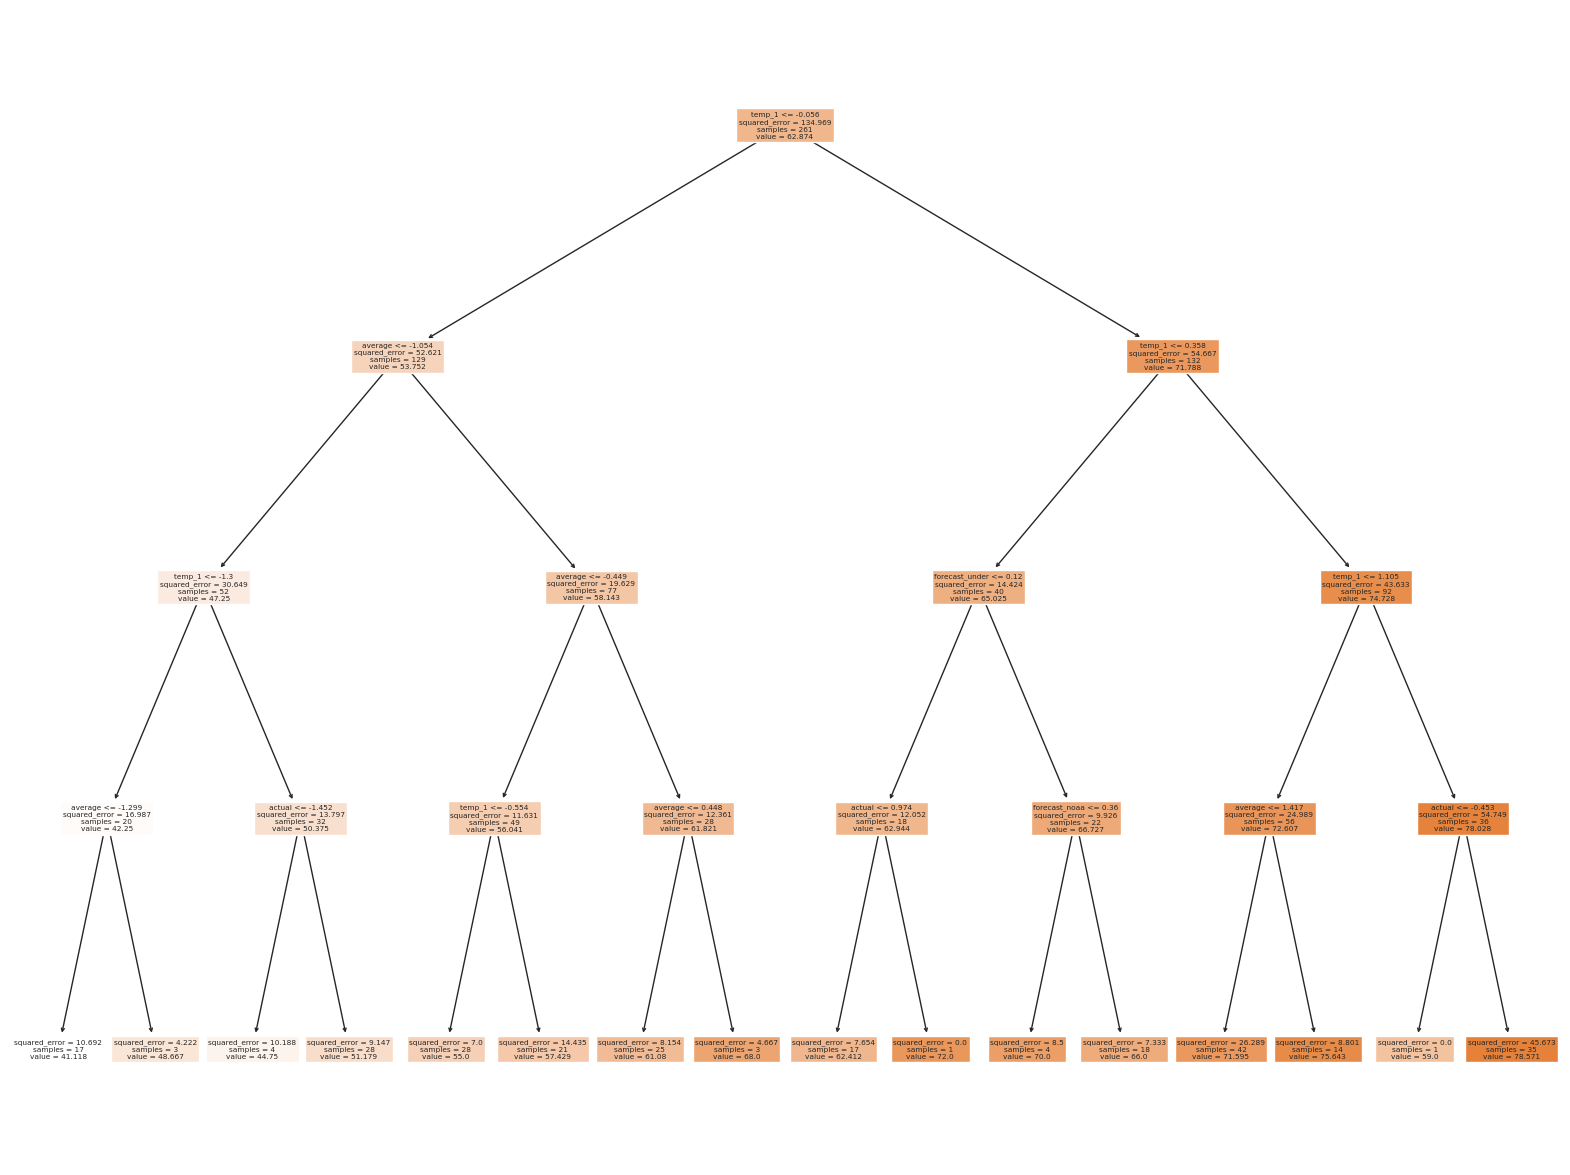

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.title('Melhor regressor')
_ = tree.plot_tree(reg_best,
                   feature_names=df.columns,
                   class_names=y_test.unique(),
                   filled=True)

**Conclusão**

Pra o modelo de árvore de decisão com o parâmetro '*max_depth*' não especificado, obtivemos as seguintes métricas:

**Dados de treino:**

* *MEAN:*  0.0
* *MAPE:*  0.0
* *MSE:*  0.0
* *RMSE:*  0.0
* *R²:*  1.0

**Dados de teste:**

* *MEAN:*  5.781609195402299
* *MAPE:*  0.09329931537191956
* *MSE:*  59.0
* *RMSE:*  3481.0
* *R²:*  0.6029399996799129

Aplicando o *cross validation* ao modelo, a acurácia foi de 0.67 com desvio padrão de 0.09.

Para o melhor parâmetro de '*max_depth*' de acordo com o gráfico **Score Rate vs Max Depth Value** (valor 4), as métricas foram as seguintes:

**Dados de treino:**

* *MEAN:*  3.1176474881140197
* *MAPE:*  0.049318693841902884
* *MSE:*  16.591163913841402
* *RMSE:*  275.2667200159532
* *R²:*  0.8770739780380298

**Dados de teste:**

* *MEAN:*  4.07075887826395
* *MAPE:*  0.06695221574918843
* *MSE:*  25.32042195398782
* *RMSE*:  641.1237679279884
* *R²:*  0.8295978517092348

Aplicando o *cross validation* ao modelo, a acurácia foi de 0.77 com desvio padrão de 0.08.

Mostrando que limitar a profundidade da árvore influenciou positivamente nas métricas do modelo tanto para os dados de teste.